## Работа с твитами

На данном этапе мы можем перейти к анализу содержания твитов, которые были предварительно отдельно предобработаны.

Первоначальная задача - постановка общего представления с помощью Word Cloud

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import numpy as np
from nltk.probability import FreqDist
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from pdtext.tm import topic_words
import pyLDAvis
import pyLDAvis.sklearn

In [2]:
tweets = pd.read_csv('/Users/andrei/PycharmProjects/TWITTER_F/data/TWEETS_wo_emoji.csv',\
                   sep='\t',parse_dates=['date_time'], lineterminator ='\n')

tweets.head()

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,date_time,user_id,username,tweet,proceed_tweet
0,1349143722940919808,2021-01-13 02:58:24+03:00,1169297966303260672,qod_gme,@MaryTravels78 If it’s any consolation ... it ...,consolation ... take help ticket day office de...
1,1349143720847953923,2021-01-13 02:58:23+03:00,376727981,trey50daniel,@jennkruza @RodAlzmann About to be the stimmy ...,stimmy bank explode like want like hear news c...
2,1349143059120881664,2021-01-13 02:55:45+03:00,1320196554821668864,marytravels78,"@QOD_GME Of not, there should be...",...
3,1349140350628220934,2021-01-13 02:45:00+03:00,967494738369753216,dantzfrye,I start my day off everyday with 0$ But I won’...,start day everyday end gme
4,1349138601058193410,2021-01-13 02:38:02+03:00,83749263,tmyrbrgh,@investing_city About to to be $GME Gamestop,gme gamestop


In [3]:
tweets = tweets.dropna()

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
tweets['tokens'] = tweets['proceed_tweet'].str.split()

tweets.head()

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,date_time,user_id,username,tweet,proceed_tweet,tokens
0,1349143722940919808,2021-01-13 02:58:24+03:00,1169297966303260672,qod_gme,@MaryTravels78 If it’s any consolation ... it ...,consolation ... take help ticket day office de...,"[consolation, ..., take, help, ticket, day, of..."
1,1349143720847953923,2021-01-13 02:58:23+03:00,376727981,trey50daniel,@jennkruza @RodAlzmann About to be the stimmy ...,stimmy bank explode like want like hear news c...,"[stimmy, bank, explode, like, want, like, hear..."
2,1349143059120881664,2021-01-13 02:55:45+03:00,1320196554821668864,marytravels78,"@QOD_GME Of not, there should be...",...,[...]
3,1349140350628220934,2021-01-13 02:45:00+03:00,967494738369753216,dantzfrye,I start my day off everyday with 0$ But I won’...,start day everyday end gme,"[start, day, everyday, end, gme]"
4,1349138601058193410,2021-01-13 02:38:02+03:00,83749263,tmyrbrgh,@investing_city About to to be $GME Gamestop,gme gamestop,"[gme, gamestop]"


In [5]:
tweets['word_len'] = tweets['tokens'].apply(lambda x: len(x))
tweets['tweet_len'] = tweets['tweet'].apply(lambda x: len(x))

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:


np.mean(tweets['tweet_len'])

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


135.57719856296777

In [7]:
clear_tweets = tweets
print(len(clear_tweets))

1598294


/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
all_words = [word for tokens in clear_tweets['tokens'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in list(clear_tweets['tokens'])]
vocab = sorted(list(set(all_words)))

print('{} всего слов, с длиной словаря {}'.format(len(all_words), len(vocab)))
print('Максимальная длина твита {}'.format(max(tweet_lengths)))

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16326078 всего слов, с длиной словаря 221944
Максимальная длина твита 70


/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


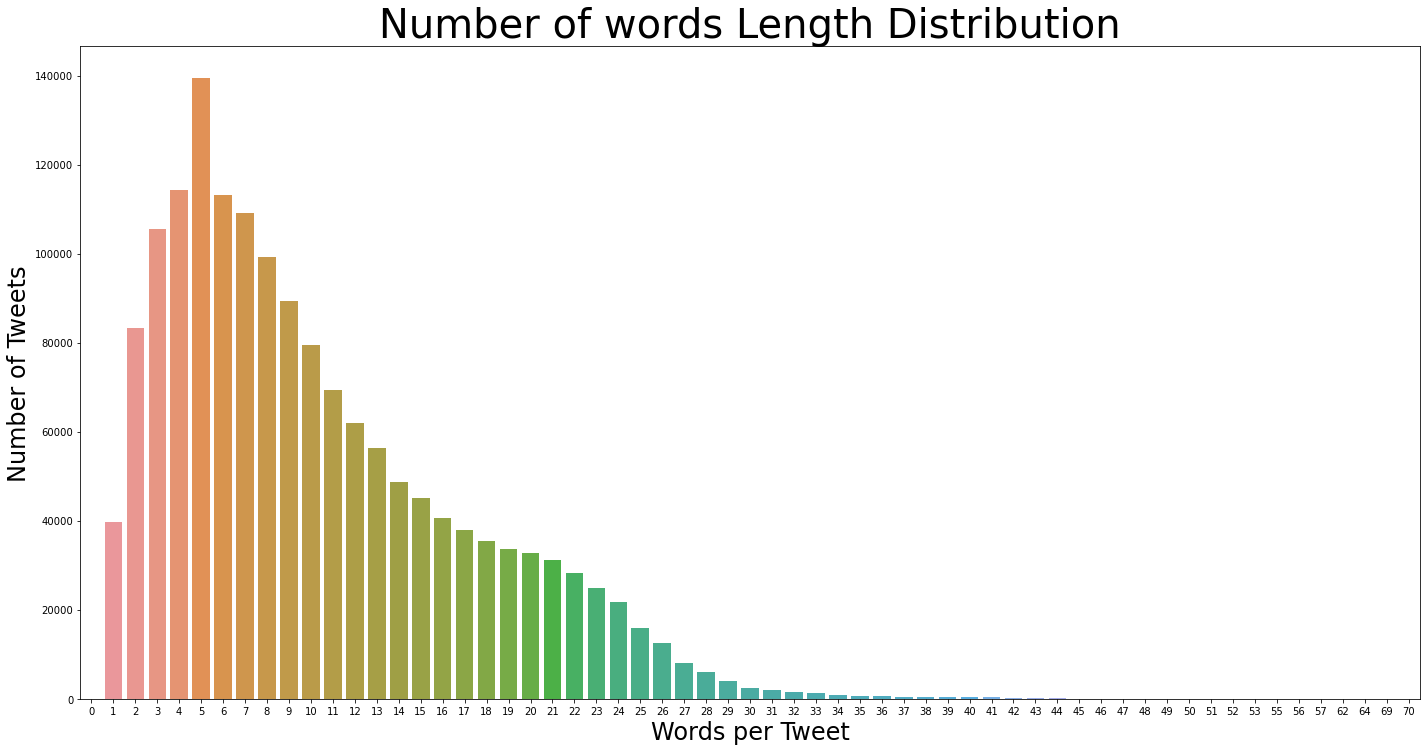

In [9]:
plt.figure(figsize = (24,12))
sns.countplot(tweet_lengths)
plt.title('Number of words Length Distribution', fontsize = 40)
plt.xlabel('Words per Tweet', fontsize = 24)
plt.ylabel('Number of Tweets', fontsize = 24)
plt.savefig('words_dist.png')
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


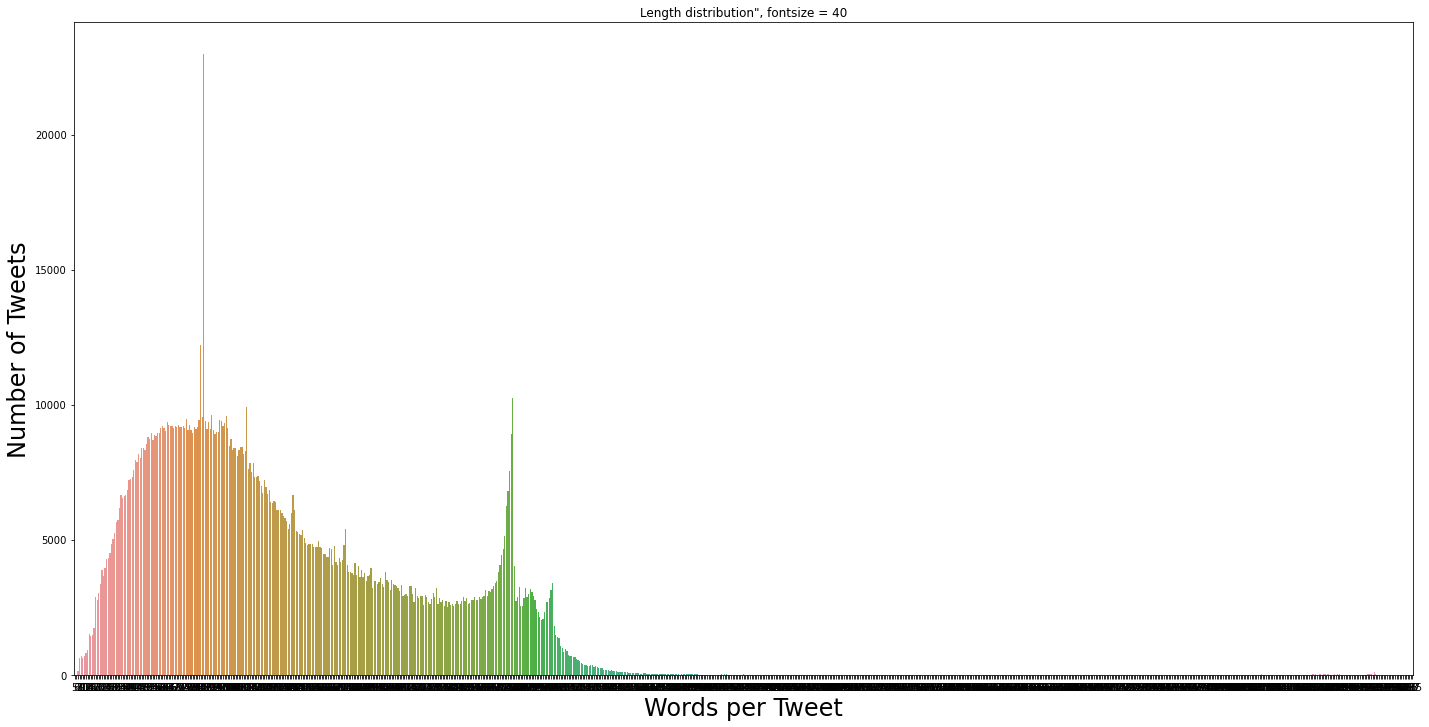

In [10]:
plt.figure(figsize = (24,12))
sns.countplot(list(tweets['tweet_len']))
plt.title('Length distribution", fontsize = 40')
plt.xlabel('Words per Tweet', fontsize = 24)
plt.ylabel('Number of Tweets', fontsize = 24)
plt.savefig('tweet_len_dist.png')
plt.show()

In [11]:
tweets.info()

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598294 entries, 0 to 1602139
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype                                
---  ------         --------------    -----                                
 0   id             1598294 non-null  int64                                
 1   date_time      1598294 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   user_id        1598294 non-null  int64                                
 3   username       1598294 non-null  object                               
 4   tweet          1598294 non-null  object                               
 5   proceed_tweet  1598294 non-null  object                               
 6   tokens         1598294 non-null  object                               
 7   word_len       1598294 non-null  int64                                
 8   tweet_len      1598294 non-null  int64                                
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), in

In [12]:
tweets['day_of_year'] = tweets.date_time.apply(lambda x: x.dayofyear)
tweets['week_of_year'] = tweets.date_time.apply(lambda x: x.weekofyear)

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-3fbed954c79e>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  tweets['week_of_year'] = tweets.date_time.apply(lambda x: x.weekofyear)


/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


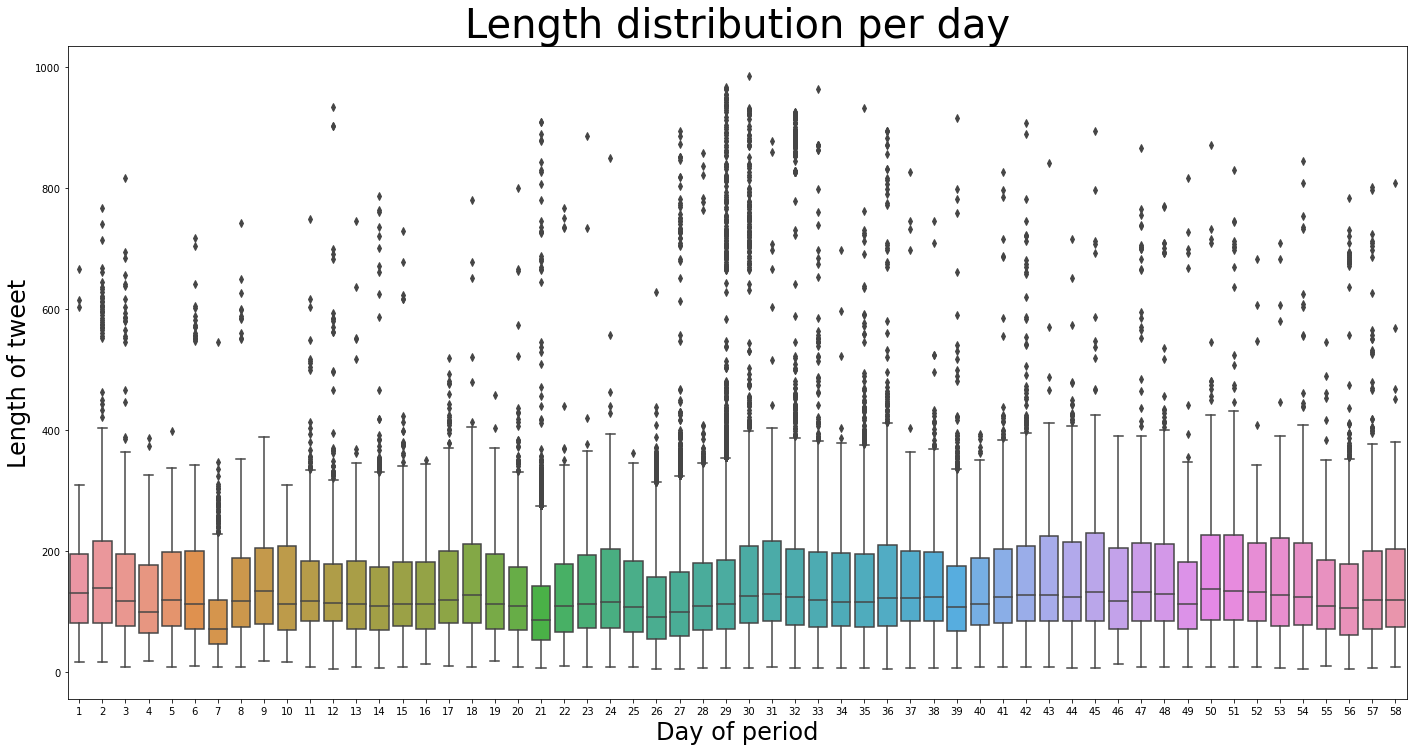

In [13]:
plt.figure(figsize = (24,12))
sns.boxplot(x = "day_of_year",
            y = "tweet_len",
            data =tweets)
plt.title('Length distribution per day', fontsize = 40)
plt.xlabel('Day of period', fontsize = 24)
plt.ylabel('Length of tweet', fontsize = 24)
plt.savefig('boxplots_lenght.png')
plt.show()

In [14]:
import nltk



/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
stop_words = ['...']

#iterate through each tweet, then each token in each tweet, and store in one list
def gen_word_cloud(df, filename ='wordcloud.png', n_words=50):

    flat_words = [item for sublist in df['tokens'] for item in sublist if item not in stop_words]

    word_freq = FreqDist(flat_words)

    #retrieve word and count from FreqDist tuples

    most_common_count = [x[1] for x in word_freq.most_common(n_words)]
    most_common_word = [x[0] for x in word_freq.most_common(n_words)]

    #create dictionary mapping of word count
    top_30_dictionary = dict(zip(most_common_word, most_common_count))

    #Create Word Cloud of top 30 words
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, colormap='Set1', collocations=False, background_color = 'white')\
    .generate_from_frequencies(top_30_dictionary)

    #plot with matplotlib
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig(filename)
    plt.show()

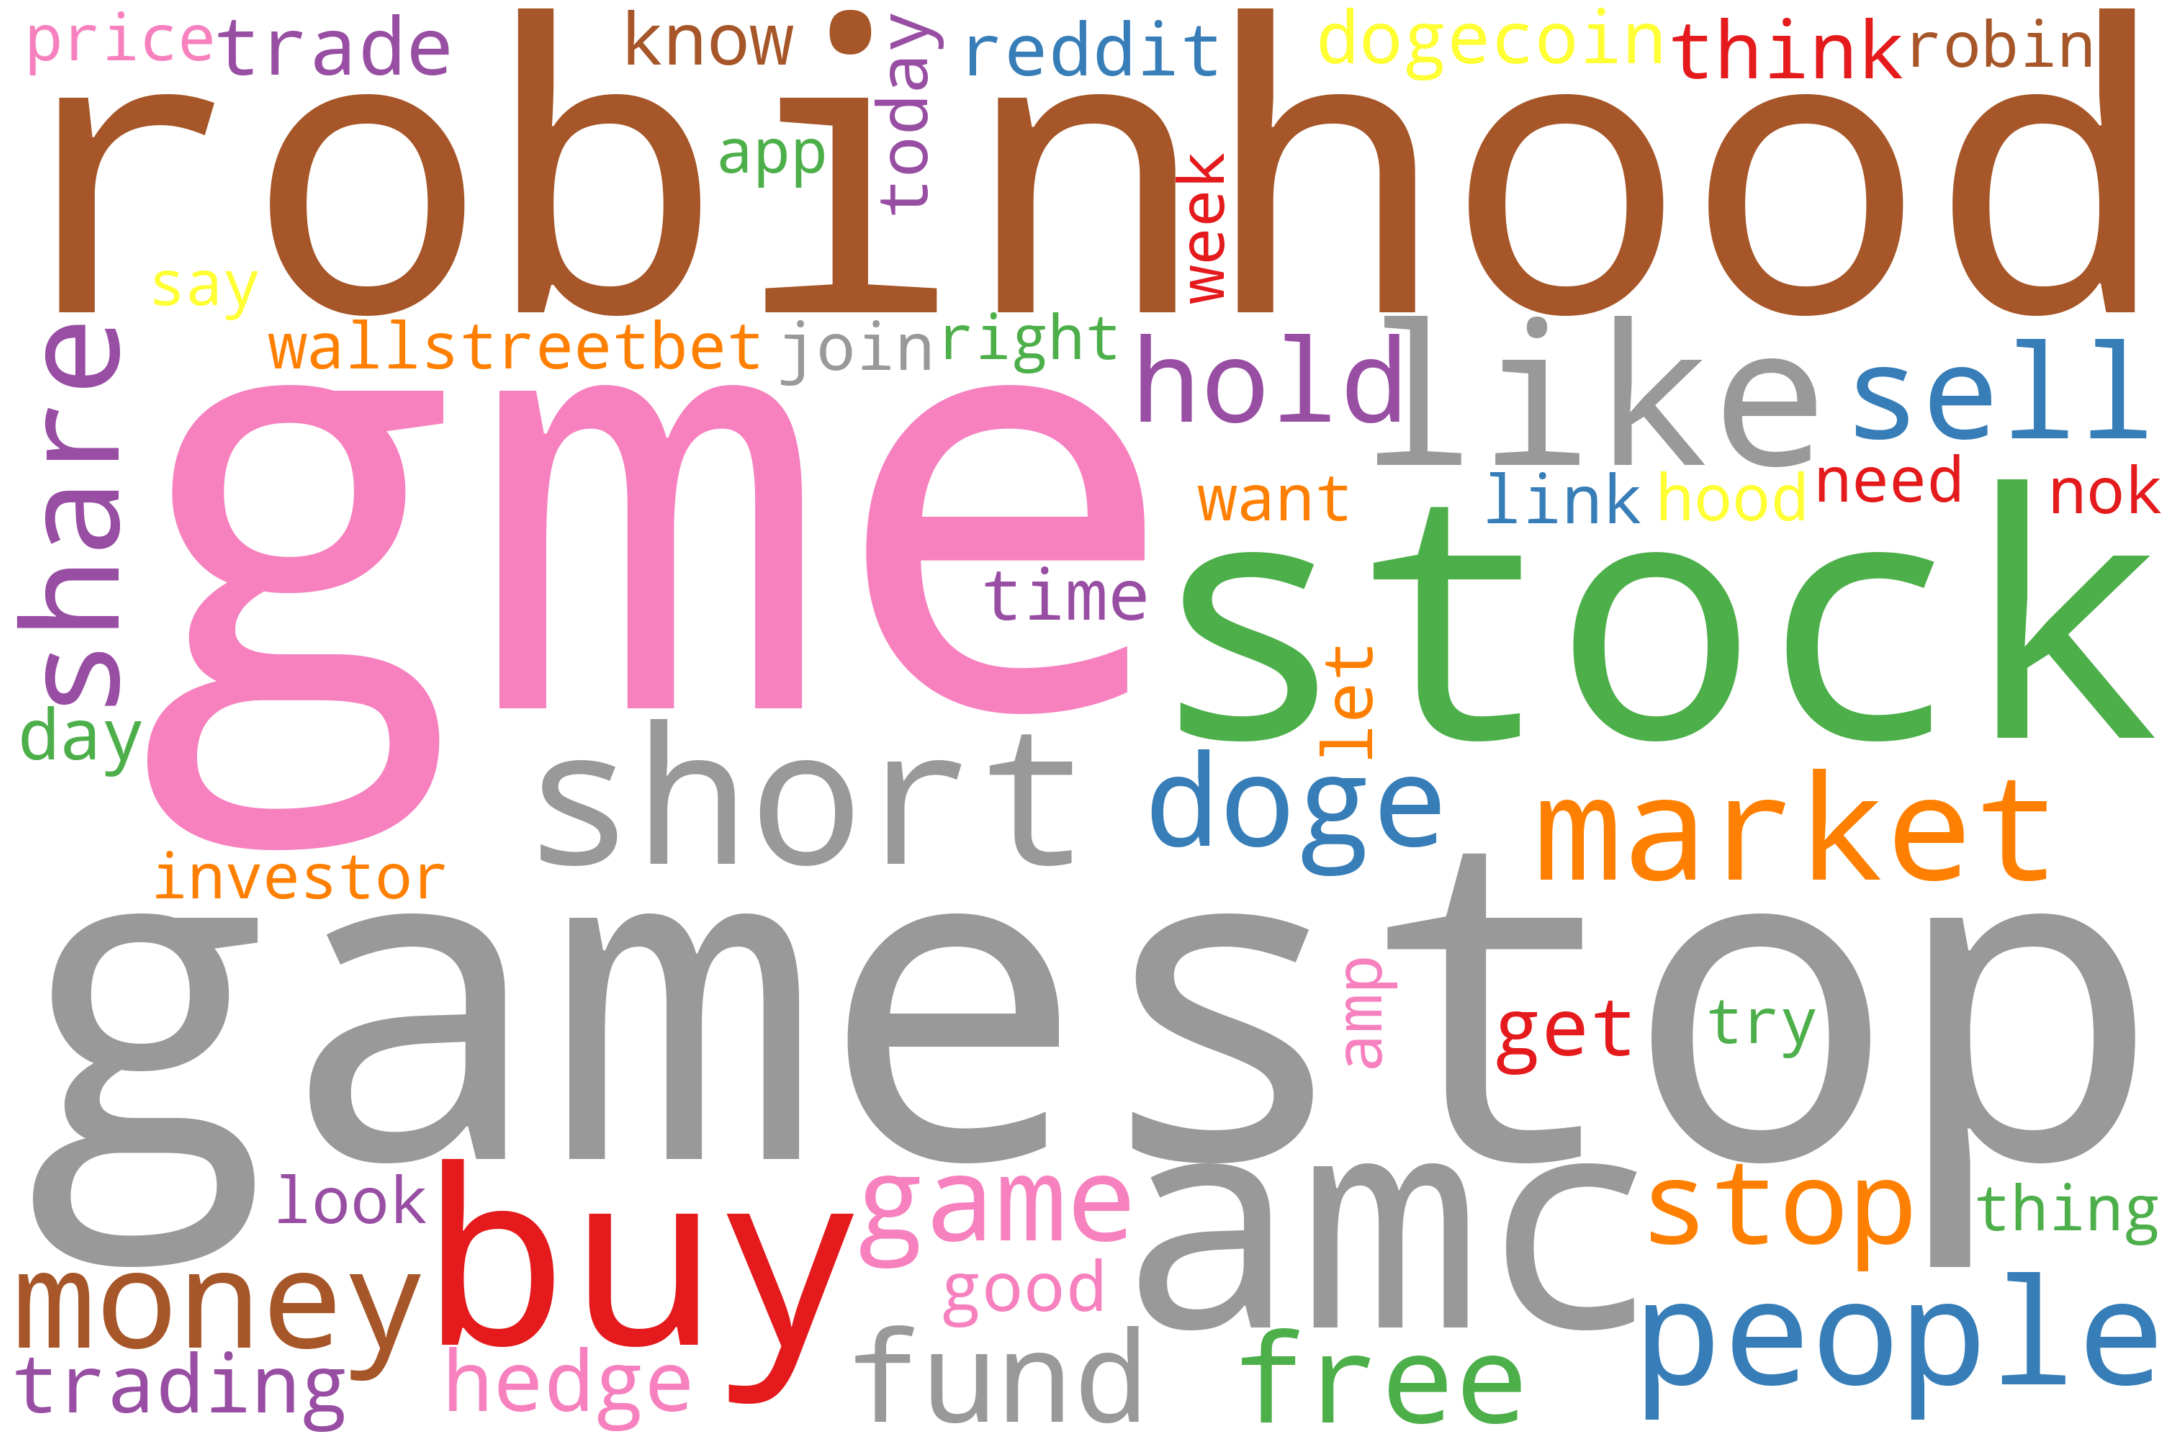

In [57]:
gen_word_cloud(tweets, filename='wordcloud_all_50.png', n_words=50)

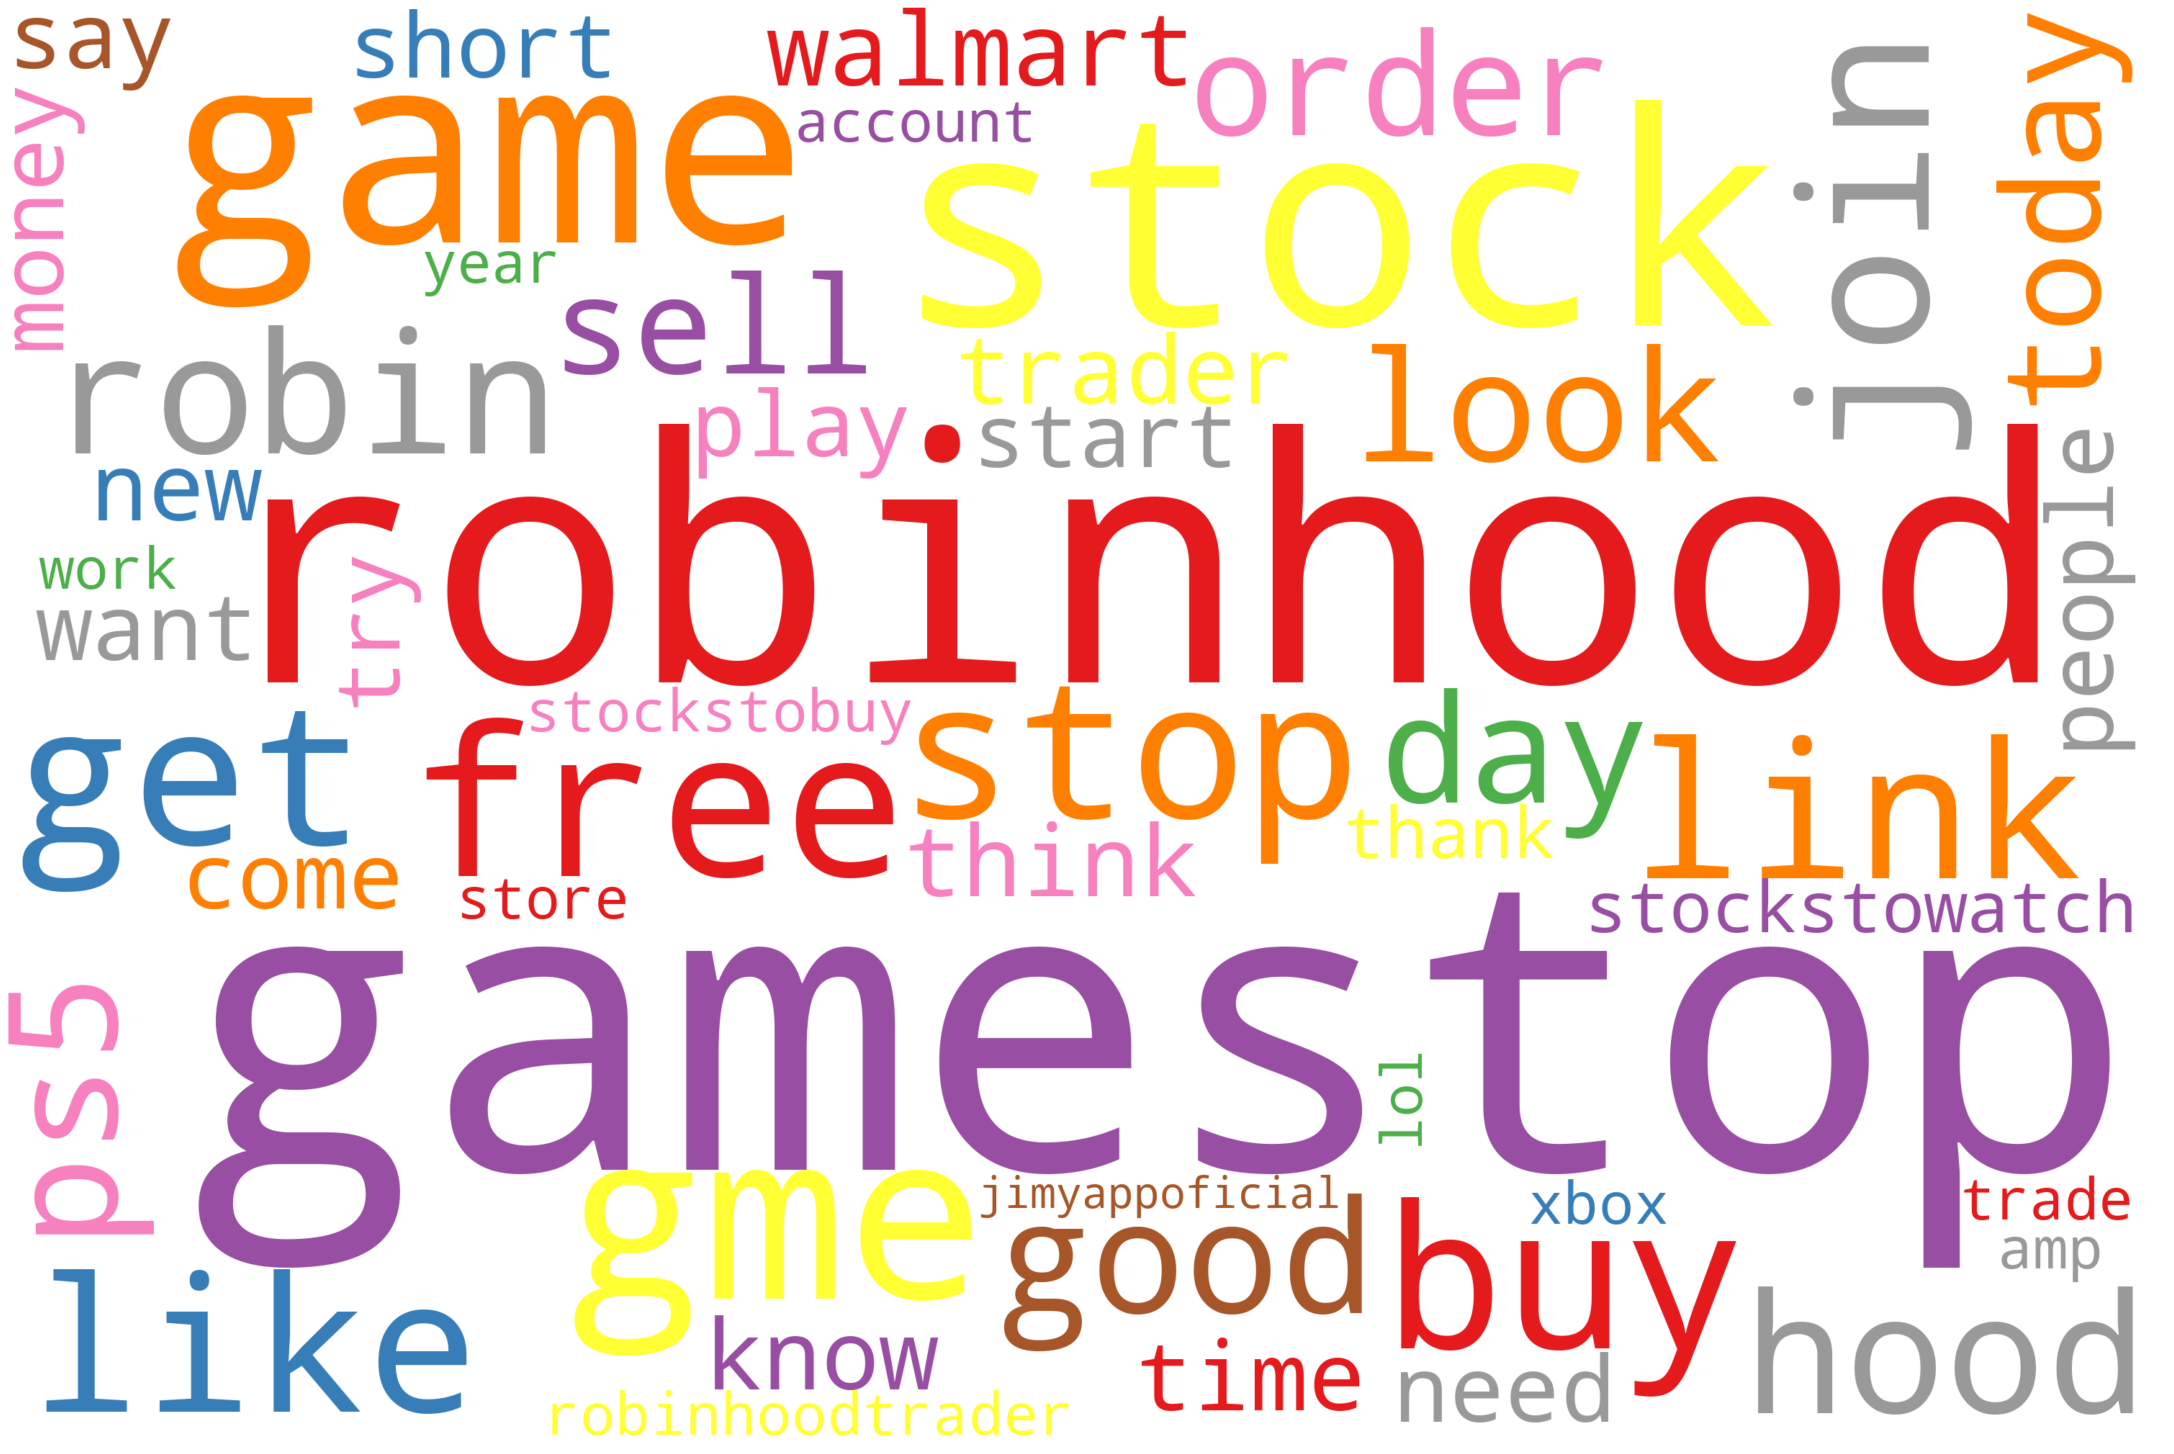

In [58]:
gen_word_cloud(tweets[tweets['date_time'] < '2021-01-15'], filename='wordcloud_before_50.png', n_words=50)

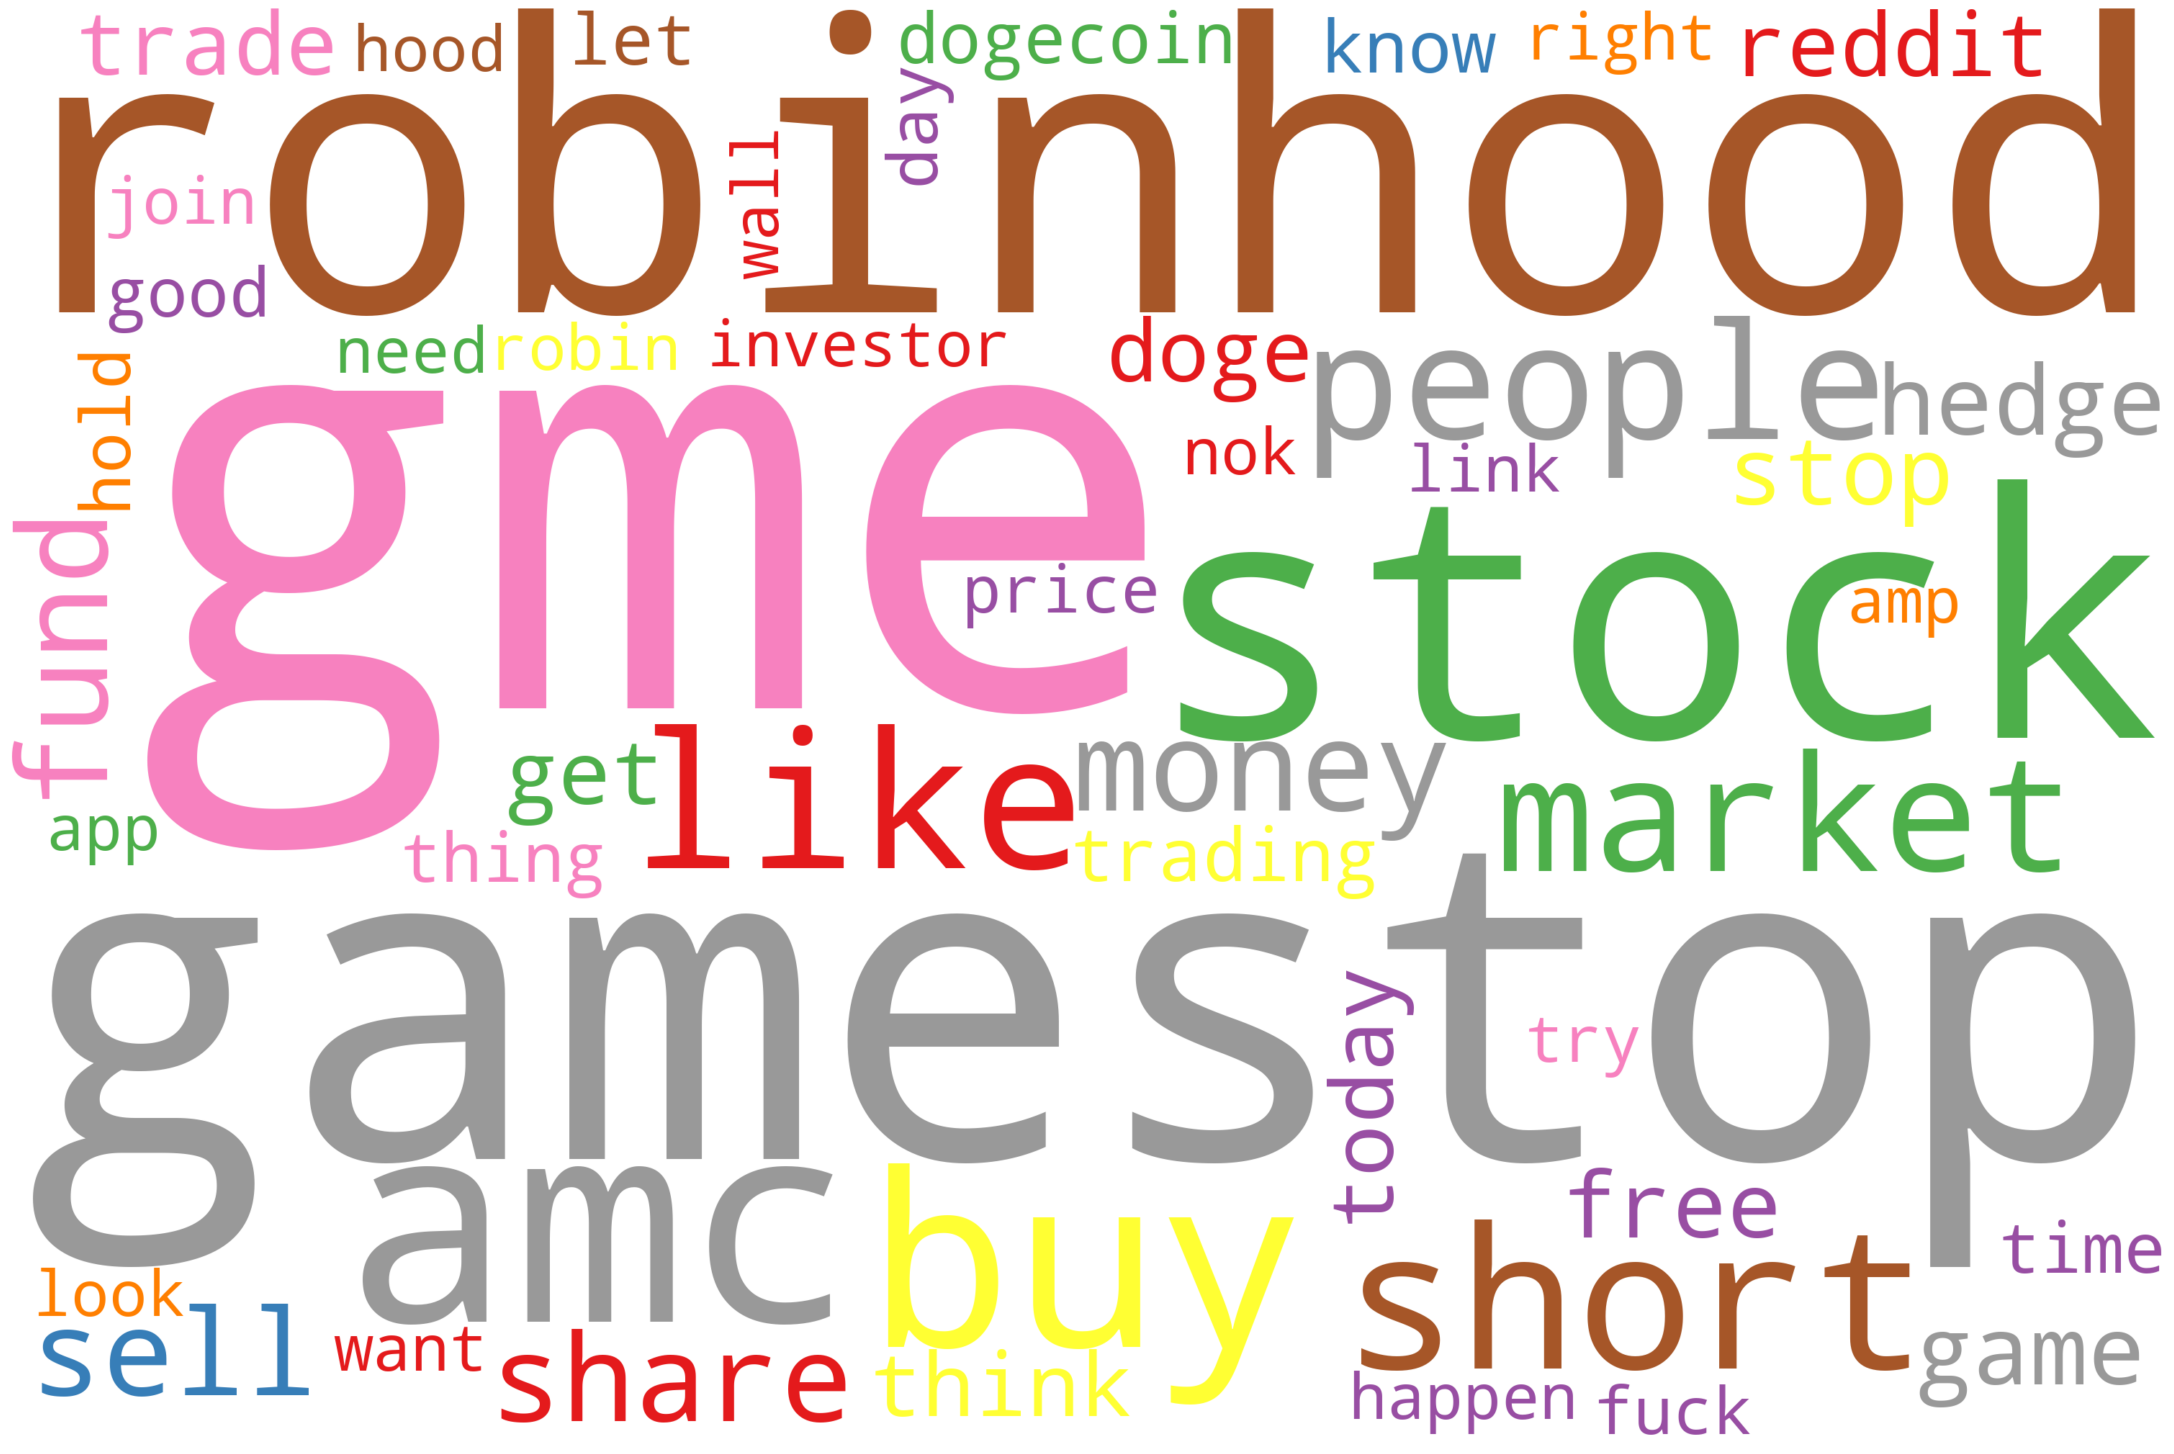

In [23]:
gen_word_cloud(tweets[(tweets['date_time'] <= '2021-01-30') &(tweets['date_time'] >= '2021-01-15')], filename='wordcloud_mid_50.png', n_words=50)

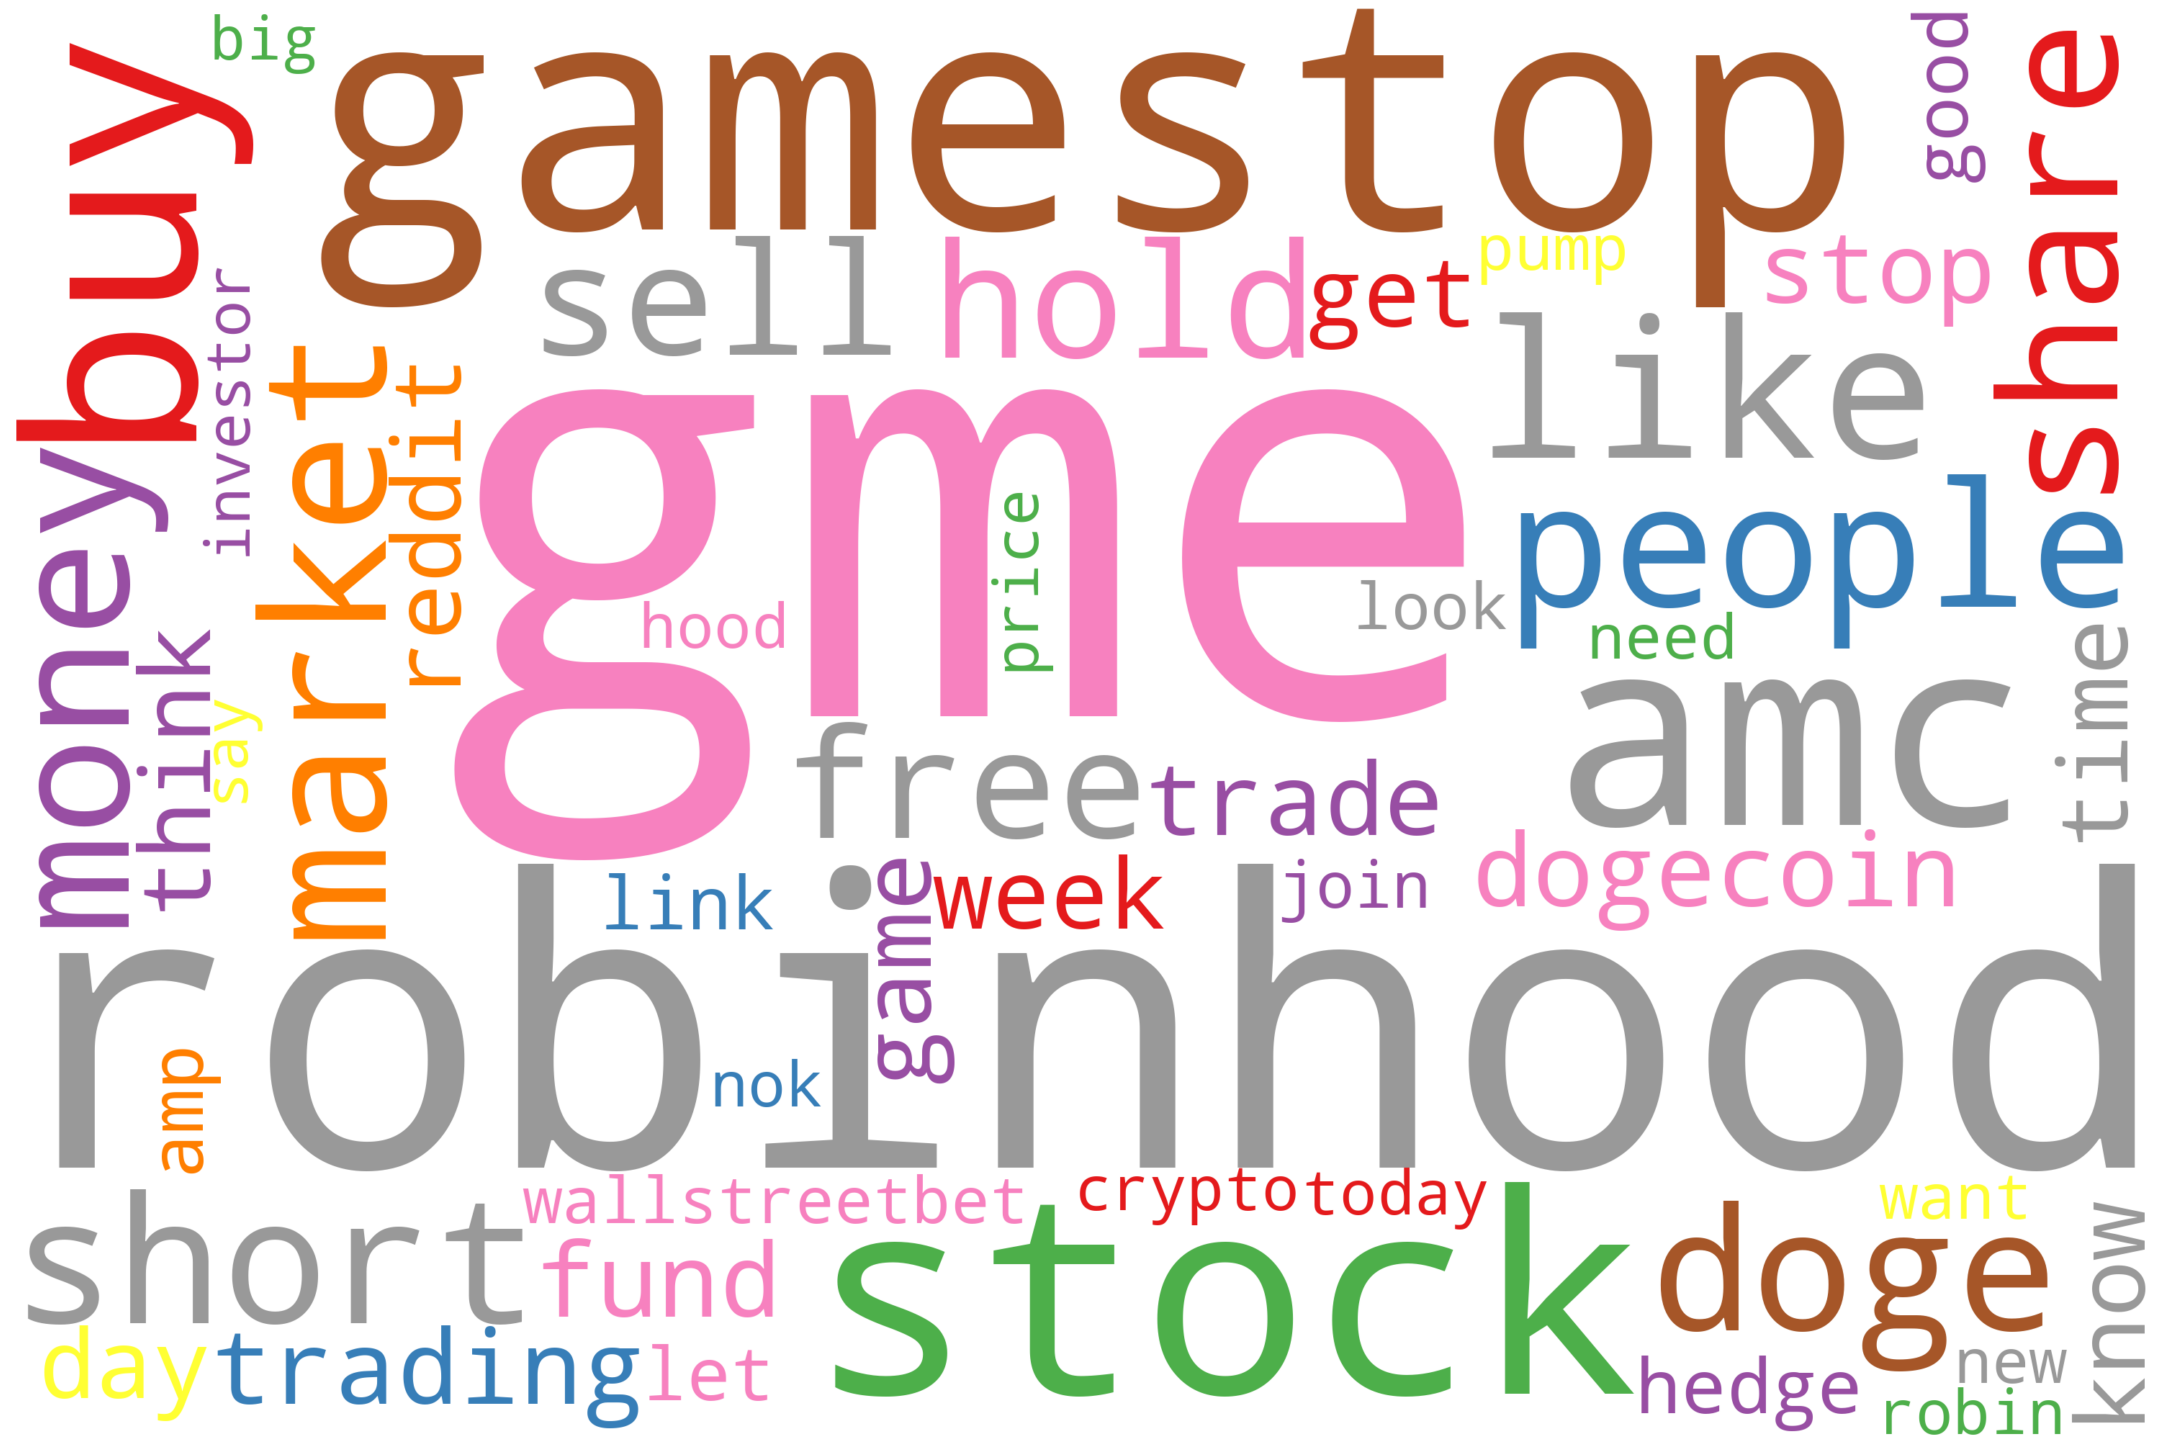

In [25]:
gen_word_cloud(tweets[(tweets['date_time'] > '2021-01-30')], filename='wordcloud_after_50.png', n_words=50)


# Тематическое моделирование дискусии

Для реализации тематического моделирования:
1) сократим промежуток до одного месяца
2) уберем ключевые поисковые слова
3) зададим нижнюю границу, чтобы в твите фигурировало как минимум 6 слова.

Векторизация текста на основе TF-IDF

Моделирование с помощью Latent Dirichlet Allocation

In [41]:

tweets['week'] = tweets['date_time'].dt.week
lda_tweets = tweets[(tweets['date_time'] >= '2021-01-01')  & (tweets['date_time'] <= '2021-02-10') & (tweets['word_len'] > 6)]

lda_tweets.shape

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-41-29166caf3e8a>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  tweets['week'] = tweets['date_time'].dt.week


(854587, 12)

In [42]:
def rm_search_words(text):
    stop_words = ['...','gamestop','robinhood','gme']
    tweet_vec = [w for w in text.split() if w not in stop_words]

    return ' '.join(tweet_vec)

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:


vectorizer = TfidfVectorizer(lowercase   = True,
                             ngram_range = (1,1),
                             max_df      = .90,
                             stop_words   = 'english',
                             max_features = 4000)


/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
vectorizer.fit(lda_tweets['proceed_tweet'])

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TfidfVectorizer(max_df=0.9, max_features=4000, stop_words='english')

In [45]:
un_word_counts = vectorizer.transform(lda_tweets['proceed_tweet'])


/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
lda_model = LatentDirichletAllocation(n_components = 4,
                                      max_iter     = 50,
                                      n_jobs       = 4,
                                      verbose      = 1)

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
lda_model.fit(un_word_counts)



/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


iteration: 1 of max_iter: 30
iteration: 2 of max_iter: 30
iteration: 3 of max_iter: 30
iteration: 4 of max_iter: 30
iteration: 5 of max_iter: 30
iteration: 6 of max_iter: 30
iteration: 7 of max_iter: 30
iteration: 8 of max_iter: 30
iteration: 9 of max_iter: 30
iteration: 10 of max_iter: 30
iteration: 11 of max_iter: 30
iteration: 12 of max_iter: 30
iteration: 13 of max_iter: 30
iteration: 14 of max_iter: 30
iteration: 15 of max_iter: 30
iteration: 16 of max_iter: 30
iteration: 17 of max_iter: 30
iteration: 18 of max_iter: 30
iteration: 19 of max_iter: 30
iteration: 20 of max_iter: 30
iteration: 21 of max_iter: 30
iteration: 22 of max_iter: 30
iteration: 23 of max_iter: 30
iteration: 24 of max_iter: 30
iteration: 25 of max_iter: 30
iteration: 26 of max_iter: 30
iteration: 27 of max_iter: 30
iteration: 28 of max_iter: 30
iteration: 29 of max_iter: 30
iteration: 30 of max_iter: 30


LatentDirichletAllocation(max_iter=30, n_components=4, n_jobs=4, verbose=1)

In [37]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(un_word_counts))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(un_word_counts))

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Log Likelihood:  -4715953.871972898
Perplexity:  2402.3339965544346


In [38]:


topic_words(lda_model, vectorizer).head(10)

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1,2,3,4,5,6,7,8,9,10
Topic 1,people,stock,like,game,money,stop,buy,fund,thing,wall
Topic 2,short,stock,market,share,fund,trading,price,investor,hedge,trade
Topic 3,free,buy,doge,dogecoin,stock,pump,hood,robin,link,join
Topic 4,amc,nok,hold,wallstreetbet,wsb,buy,nakd,stock,moon,tsla


In [93]:
all_tweets = vectorizer.transform(tweets['proceed_tweet'])

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
lda_labels = lda_model.transform(all_tweets)

#tweets['lda_pred'] = lda_labels

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
lda_predictions = pd.DataFrame(data=lda_labels, columns=['Topic_0','Topic_1', 'Topic_2','Topic_3'])

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Полученный двумерный массив с результами размещения всех наших твитов

In [98]:
lda_predictions.head()

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_0,Topic_1,Topic_2,Topic_3
0,0.074027,0.076900,0.774673,0.074401
1,0.058213,0.067575,0.642715,0.231497
2,0.250000,0.250000,0.250000,0.250000
3,0.081954,0.743137,0.088514,0.086394
4,0.104810,0.129157,0.111850,0.654183


In [99]:
tweets = pd.concat([tweets,lda_predictions], axis = 1)

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
tweets.to_csv('/Users/andrei/PycharmProject/TWITTER_F/data/TWEETS_w_lda.csv', sep='\t',index=False)

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, un_word_counts, vectorizer, mds='tsne')
panel

In [92]:
pyLDAvis.save_html(panel, 'lda.html')


/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
tweets_w_lda = pd.read_csv('/Users/andrei/PycharmProjects/TWITTER_F/data/TWEETS_w_lda.csv', sep='\t', lineterminator='\n', parse_dates=['date_time'])

tweets_w_lda = tweets_w_lda.dropna()
tweets_w_lda = tweets_w_lda[(tweets_w_lda['date_time'] > '2020-12-30') & (tweets_w_lda['date_time'] < '2021-02-21')]
tweets_w_lda.head()

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,date_time,user_id,username,tweet,proceed_tweet,tokens,word_len,tweet_len,day_of_year,week_of_year,week,Topic_0,Topic_1,Topic_2,Topic_3
0,1.349144e+18,2021-01-13 02:58:24+03:00,1.169298e+18,qod_gme,@MaryTravels78 If it’s any consolation ... it ...,consolation ... take help ticket day office de...,"['consolation', '...', 'take', 'help', 'ticket...",12.0,153.0,13.0,2.0,2.0,0.074027,0.076900,0.774673,0.074401
1,1.349144e+18,2021-01-13 02:58:23+03:00,3.767280e+08,trey50daniel,@jennkruza @RodAlzmann About to be the stimmy ...,stimmy bank explode like want like hear news c...,"['stimmy', 'bank', 'explode', 'like', 'want', ...",15.0,200.0,13.0,2.0,2.0,0.058213,0.067575,0.642715,0.231497
2,1.349143e+18,2021-01-13 02:55:45+03:00,1.320197e+18,marytravels78,"@QOD_GME Of not, there should be...",...,['...'],1.0,35.0,13.0,2.0,2.0,0.250000,0.250000,0.250000,0.250000
3,1.349140e+18,2021-01-13 02:45:00+03:00,9.674947e+17,dantzfrye,I start my day off everyday with 0$ But I won’...,start day everyday end gme,"['start', 'day', 'everyday', 'end', 'gme']",5.0,71.0,13.0,2.0,2.0,0.081954,0.743137,0.088514,0.086394
4,1.349139e+18,2021-01-13 02:38:02+03:00,8.374926e+07,tmyrbrgh,@investing_city About to to be $GME Gamestop,gme gamestop,"['gme', 'gamestop']",2.0,44.0,13.0,2.0,2.0,0.104810,0.129157,0.111850,0.654183


In [103]:
# Make the pandas dataframe
df_document_topic = tweets_w_lda[['Topic_0','Topic_1','Topic_2','Topic_3']]
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .6 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-103-2ad2bbea6ed0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_document_topic['dominant_topic'] = dominant_topic


,Topic_0,Topic_1,Topic_2,Topic_3,dominant_topic
0,0.074027,0.076900,0.774673,0.074401,2
1,0.058213,0.067575,0.642715,0.231497,2
2,0.250000,0.250000,0.250000,0.250000,0
3,0.081954,0.743137,0.088514,0.086394,1
4,0.104810,0.129157,0.111850,0.654183,3
5,0.071156,0.572669,0.289915,0.066260,1
6,0.094241,0.100541,0.704479,0.100739,2
7,0.080866,0.752932,0.082695,0.083506,1
8,0.755554,0.129120,0.049876,0.065451,0
9,0.109299,0.112258,0.596274,0.182170,2


In [104]:
df_document_topic['date'] = tweets_w_lda['date_time'].dt.normalize()


/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-104-b906322db0c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_document_topic['date'] = tweets_w_lda['date_time'].dt.normalize()


In [110]:
df_topic_dist = df_document_topic[['date','dominant_topic']].value_counts().reset_index(name="num_doc")


/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
total_topic_dist = df_topic_dist.pivot_table(index='date', values = 'num_doc', aggfunc=np.sum)
total_topic_dist.columns = ['total_per_day']

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
df_topic_dist = df_topic_dist.merge(total_topic_dist, on='date')

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
df_topic_dist['plot_value'] = df_topic_dist['num_doc'] / df_topic_dist['total_per_day']

/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


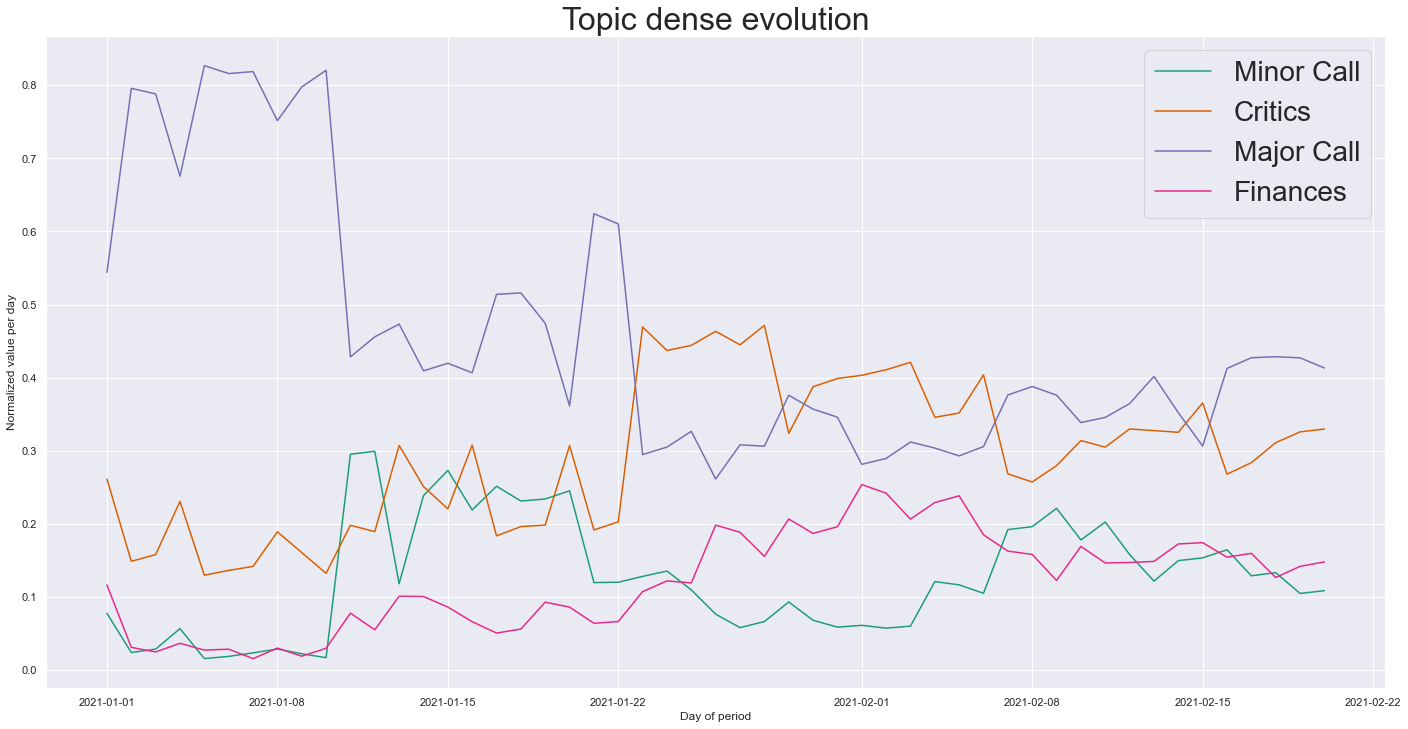

In [145]:
sns.set()

plt.figure(figsize = (24,12))
plt.title('Topic dense evolution', fontsize = 32)
ax = sns.lineplot(x='date', y='plot_value',palette ='Dark2', hue = 'dominant_topic',data=df_topic_dist)

# replace labels
ax.legend(title='Topics')
plt.legend(['Minor Call', 'Critics','Major Call','Finances'],fontsize =28)
plt.xlabel('Day of period', fontsize = 12)
plt.ylabel('Normalized value per day', fontsize = 12)
#new_labels = ['Block', 'Critics','Call','Finances']
#for t, l in zip(ax.legend, new_labels): t.set_text(l)

plt.savefig('topic_evolution.png')